In [4]:
import pandas as pd

In [11]:
dwd_data_44 = pd.read_csv('/data/ammda/2021/stundenwerte_TU_00044_20070401_20201231_hist/produkt_tu_stunde_20070401_20201231_00044.txt',
           sep=';')

In [23]:
dwd_data_44.head() #Now the data is correctly splitted into multiply columns

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,44,2007040100,3,7.3,78.0,eor
1,44,2007040101,3,6.4,79.0,eor
2,44,2007040102,3,5.4,80.0,eor
3,44,2007040103,3,4.9,80.0,eor
4,44,2007040104,3,4.5,77.0,eor


## Indexing or read single column
If we wanted to get single columns, rows or elements of a numpy array we used indexing so far, for pandas dataframe it is even easier to get the data you want to look at, let's say you want to just look at the Temperature 

First we have to identify the column storing the temperture, from additional data given on the DWD server we now that the temperature is stored in TT_TU, this we can now use to index the dataframe

In [22]:
dwd_data_44['TT_TU'].head()

0    7.3
1    6.4
2    5.4
3    4.9
4    4.5
Name: TT_TU, dtype: float64

We now see only this column data, together with the index column, so the very first column. This is called a _pandas series_. \
A _pandas dataframe_ consists of multiple _pandas series_.

In [24]:
dwd_data_44['RF_TU'].head() # Ofcourse we can also select another column

0    78.0
1    79.0
2    80.0
3    80.0
4    77.0
Name: RF_TU, dtype: float64

In [21]:
dwd_data_44[['TT_TU', 'RF_TU']].head() # we can select multiple columns

,TT_TU,RF_TU
0,7.3,78.0
1,6.4,79.0
2,5.4,80.0
3,4.9,80.0
4,4.5,77.0


## Get the column names

In [26]:
dwd_data_44.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_9', 'TT_TU', 'RF_TU', 'eor'], dtype='object')

## Set index
There are two ways to set the index, either you directly tell pandas which column it should use as an index when opening the data or we set it manually afterwards

In [27]:
dwd_data_44_2 = pd.read_csv('/data/ammda/2021/stundenwerte_TU_00044_20070401_20201231_hist/produkt_tu_stunde_20070401_20201231_00044.txt',
           sep=';', index_col=['MESS_DATUM']) #mess_datum is german for measuring date

In [29]:
dwd_data_44_2.head()

,STATIONS_ID,QN_9,TT_TU,RF_TU,eor
MESS_DATUM,,,,,
2007040100,44,3,7.3,78.0,eor
2007040101,44,3,6.4,79.0,eor
2007040102,44,3,5.4,80.0,eor
2007040103,44,3,4.9,80.0,eor
2007040104,44,3,4.5,77.0,eor


### Set index afterwards

Or we set the index columns afterwards

In [30]:
dwd_data_44.set_index('MESS_DATUM').head()

,STATIONS_ID,QN_9,TT_TU,RF_TU,eor
MESS_DATUM,,,,,
2007040100,44,3,7.3,78.0,eor
2007040101,44,3,6.4,79.0,eor
2007040102,44,3,5.4,80.0,eor
2007040103,44,3,4.9,80.0,eor
2007040104,44,3,4.5,77.0,eor


In [31]:
dwd_data_44.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,44,2007040100,3,7.3,78.0,eor
1,44,2007040101,3,6.4,79.0,eor
2,44,2007040102,3,5.4,80.0,eor
3,44,2007040103,3,4.9,80.0,eor
4,44,2007040104,3,4.5,77.0,eor


You see that it has not changed the dataframe forever, it only changed in temporaly. Can we change this? Yes!

In [32]:
dwd_data_44.set_index('MESS_DATUM', inplace=True)

In [33]:
dwd_data_44.head()

,STATIONS_ID,QN_9,TT_TU,RF_TU,eor
MESS_DATUM,,,,,
2007040100,44,3,7.3,78.0,eor
2007040101,44,3,6.4,79.0,eor
2007040102,44,3,5.4,80.0,eor
2007040103,44,3,4.9,80.0,eor
2007040104,44,3,4.5,77.0,eor


## Index

In [38]:
dwd_data_44['MESS_DATUM']

KeyError: 'MESS_DATUM'

The index column can not be acessed by its name like we did for the other columns, here we just use .index:

In [39]:
dwd_data_44.index

Int64Index([2007040100, 2007040101, 2007040102, 2007040103, 2007040104,
            2007040105, 2007040106, 2007040107, 2007040108, 2007040109,
            ...
            2020123114, 2020123115, 2020123116, 2020123117, 2020123118,
            2020123119, 2020123120, 2020123121, 2020123122, 2020123123],
           dtype='int64', name='MESS_DATUM', length=119787)

Now we have the time as index, but it looks a bit strange, not like a real timestamp, and we see in the 'dytpe' above, that the numbers are interpreted as integers. \
Let's change that in the next step.

## Dates

Making pandas interpret a column as dates can be also done directly while reading, we add now a new argument parse_date to the reading function, to tell python to parse this specific column(s) to datetime objects

In [41]:
dwd_44_date = pd.read_csv('/data/ammda/2021/stundenwerte_TU_00044_20070401_20201231_hist/produkt_tu_stunde_20070401_20201231_00044.txt',
                           sep=';', index_col=['MESS_DATUM'], parse_dates=['MESS_DATUM'])

In [42]:
dwd_44_date.head()

,STATIONS_ID,QN_9,TT_TU,RF_TU,eor
MESS_DATUM,,,,,
2007040100,44,3,7.3,78.0,eor
2007040101,44,3,6.4,79.0,eor
2007040102,44,3,5.4,80.0,eor
2007040103,44,3,4.9,80.0,eor
2007040104,44,3,4.5,77.0,eor


In [43]:
dwd_44_date.index

Int64Index([2007040100, 2007040101, 2007040102, 2007040103, 2007040104,
            2007040105, 2007040106, 2007040107, 2007040108, 2007040109,
            ...
            2020123114, 2020123115, 2020123116, 2020123117, 2020123118,
            2020123119, 2020123120, 2020123121, 2020123122, 2020123123],
           dtype='int64', name='MESS_DATUM', length=119787)

Unfortunatly in this case, pandas is not able to parse this directly into a datetime object, since it does not now how to interpret this numbers. \
If this happend we can always pass them manually:

In [44]:
dates = pd.to_datetime(dwd_44_date.index, format = '%Y%m%d%H')

In [45]:
dates

DatetimeIndex(['2007-04-01 00:00:00', '2007-04-01 01:00:00',
               '2007-04-01 02:00:00', '2007-04-01 03:00:00',
               '2007-04-01 04:00:00', '2007-04-01 05:00:00',
               '2007-04-01 06:00:00', '2007-04-01 07:00:00',
               '2007-04-01 08:00:00', '2007-04-01 09:00:00',
               ...
               '2020-12-31 14:00:00', '2020-12-31 15:00:00',
               '2020-12-31 16:00:00', '2020-12-31 17:00:00',
               '2020-12-31 18:00:00', '2020-12-31 19:00:00',
               '2020-12-31 20:00:00', '2020-12-31 21:00:00',
               '2020-12-31 22:00:00', '2020-12-31 23:00:00'],
              dtype='datetime64[ns]', name='MESS_DATUM', length=119787, freq=None)

## Add new columns

In [46]:
dwd_44_date['TIME'] = dates

In [48]:
dwd_44_date.head()

,STATIONS_ID,QN_9,TT_TU,RF_TU,eor,TIME
MESS_DATUM,,,,,,
2007040100,44,3,7.3,78.0,eor,2007-04-01 00:00:00
2007040101,44,3,6.4,79.0,eor,2007-04-01 01:00:00
2007040102,44,3,5.4,80.0,eor,2007-04-01 02:00:00
2007040103,44,3,4.9,80.0,eor,2007-04-01 03:00:00
2007040104,44,3,4.5,77.0,eor,2007-04-01 04:00:00


We assign a new column (like indexing a column with a non-existing name) to some data, called dates. \
Of course you could also combine this into a single line and replace the 'dates' directly with the line pd.to_datetime(dwd_44_date.index, format='%Y%m%d%H')

In [51]:
dwd_44_date['TIME'] = pd.to_datetime(dwd_44_date.index, format = '%Y%m%d%H')

In [53]:
dwd_44_date.head()

,STATIONS_ID,QN_9,TT_TU,RF_TU,eor,TIME
MESS_DATUM,,,,,,
2007040100,44,3,7.3,78.0,eor,2007-04-01 00:00:00
2007040101,44,3,6.4,79.0,eor,2007-04-01 01:00:00
2007040102,44,3,5.4,80.0,eor,2007-04-01 02:00:00
2007040103,44,3,4.9,80.0,eor,2007-04-01 03:00:00
2007040104,44,3,4.5,77.0,eor,2007-04-01 04:00:00


In [54]:
dwd_44_date.set_index('TIME', inplace = True) # setting the new column as new index

In [56]:
dwd_44_date.head()

,STATIONS_ID,QN_9,TT_TU,RF_TU,eor
TIME,,,,,
2007-04-01 00:00:00,44,3,7.3,78.0,eor
2007-04-01 01:00:00,44,3,6.4,79.0,eor
2007-04-01 02:00:00,44,3,5.4,80.0,eor
2007-04-01 03:00:00,44,3,4.9,80.0,eor
2007-04-01 04:00:00,44,3,4.5,77.0,eor


## Drop columns

We can not only add column, we can also drop them of course, let's get rid of the columns QN_9 and eor for now, since we will not deal with them today.

In [59]:
dwd_44_date.drop(['QN_9', 'eor'], axis = 1, inplace = True)

In [60]:
dwd_44_date.head()

,STATIONS_ID,TT_TU,RF_TU
TIME,,,
2007-04-01 00:00:00,44,7.3,78.0
2007-04-01 01:00:00,44,6.4,79.0
2007-04-01 02:00:00,44,5.4,80.0
2007-04-01 03:00:00,44,4.9,80.0
2007-04-01 04:00:00,44,4.5,77.0


the axis=1 says that it should drop columns not rows, which would be done by default and by using axis=0 \
and do not forget the inplace here

## Renaming columns
We now have a clean dataframe with no not needed colmns, but it would be nice to have better names for the columns, right?

In [63]:
dwd_44_date.rename(columns={'TT_TU': 'Temp', 'RF_TU' : 'RF'}, inplace = True)

In [65]:
dwd_44_date.head()

,STATIONS_ID,Temp,RF
TIME,,,
2007-04-01 00:00:00,44,7.3,78.0
2007-04-01 01:00:00,44,6.4,79.0
2007-04-01 02:00:00,44,5.4,80.0
2007-04-01 03:00:00,44,4.9,80.0
2007-04-01 04:00:00,44,4.5,77.0


## Plotting

In [66]:
import matplotlib.pyplot as plt

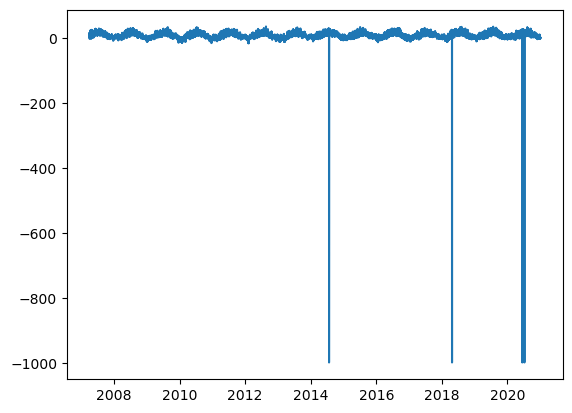

In [74]:
plt.figure()

plt.plot (dwd_44_date.index,dwd_44_date['Temp'])

plt.show()
plt.close()

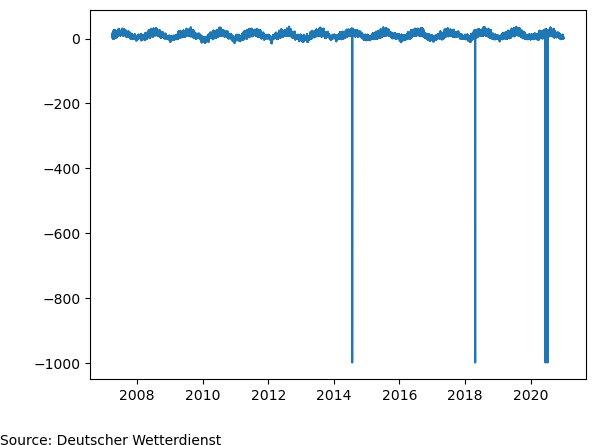

In [78]:
plt.figure()

plt.plot (dwd_44_date.index,dwd_44_date['Temp'])
plt.annotate('Source: Deutscher Wetterdienst', xy=(0,0.1), xycoords='figure points')

plt.show()
plt.close()

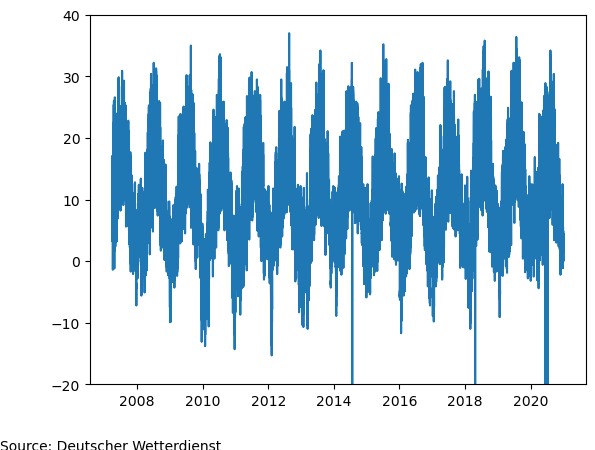

In [82]:
plt.figure()

plt.plot(dwd_44_date.index,dwd_44_date['Temp'])
plt.ylim(-20,40)

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,0.1), xycoords='figure points')

plt.show()
plt.close()

We can clearly see the seasonal cylcle, but it is many data to look at, so let's also limit the x axis

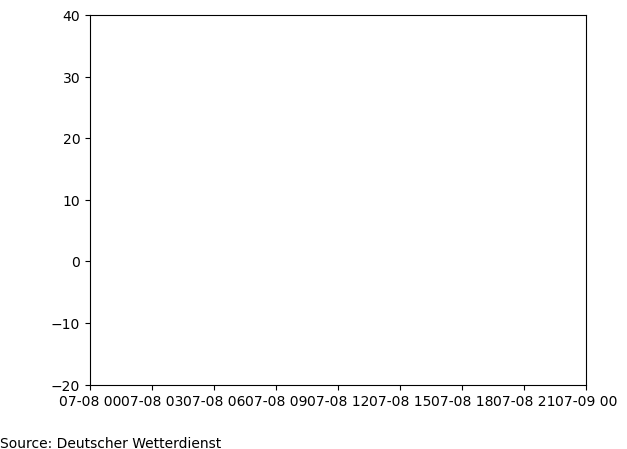

In [85]:
plt.figure()

plt.plot(dwd_44_date.index,dwd_44_date['Temp'])

plt.ylim(-20,40)
plt.xlim(2014,2015)

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')

plt.show()
plt.close()

But now like this, matplotlib interprets the limits as normal numbers, in the background the date still is a (very large) number, so we need to limit using datetime objects

Either we use the to_daetime we already used before to convert an integer to a datetime

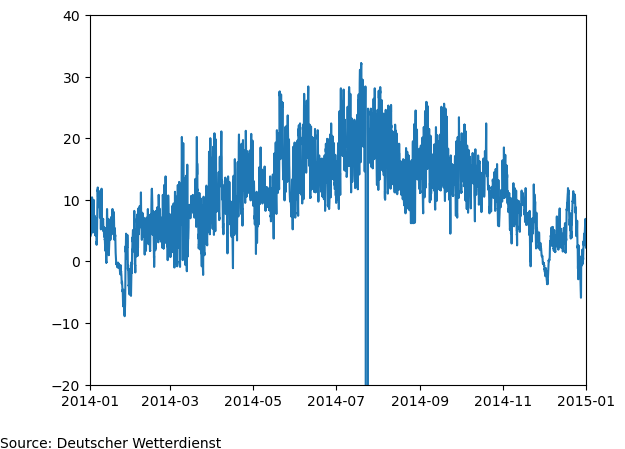

In [86]:
plt.figure()

plt.plot(dwd_44_date.index,dwd_44_date['Temp'])

plt.ylim(-20,40)
plt.xlim(pd.to_datetime(20140101, format='%Y%m%d'), pd.to_datetime(20150101, format='%Y%m%d'))

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')

plt.show()
plt.close()

Or we directly create a datetime object using _Timestamp_

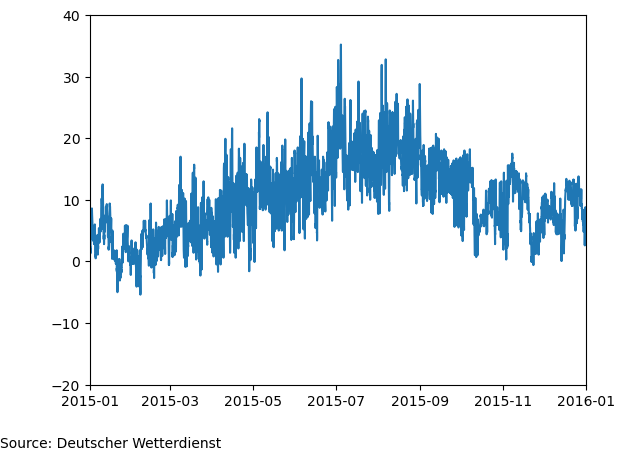

In [87]:
plt.figure()

plt.plot(dwd_44_date.index,dwd_44_date['Temp'])

plt.ylim(-20,40)
plt.xlim(pd.Timestamp(2015,1,1), pd.Timestamp(2016,1,1))

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')

plt.show()
plt.close()

And we can also plot both curves into one plot

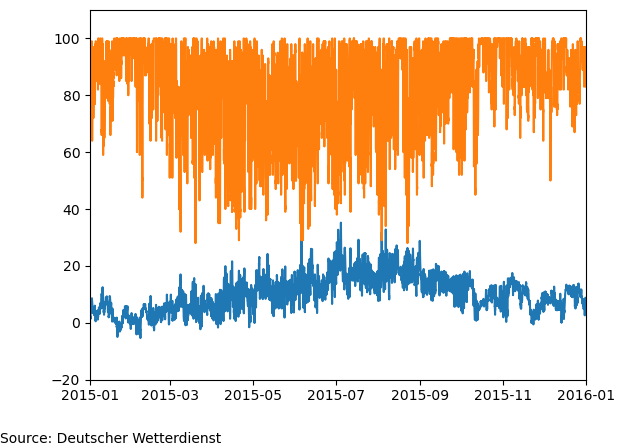

In [97]:
plt.figure()

plt.plot(dwd_44_date.index,dwd_44_date['Temp'])
plt.plot(dwd_44_date.index,dwd_44_date['RF'])

plt.ylim(-20,110)
plt.xlim(pd.Timestamp(2015,1,1), pd.Timestamp(2016,1,1))

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')

plt.show()
plt.close()

But with pandas things are even more simple

In [99]:
dwd_44_date.head()

,STATIONS_ID,Temp,RF
TIME,,,
2007-04-01 00:00:00,44,7.3,78.0
2007-04-01 01:00:00,44,6.4,79.0
2007-04-01 02:00:00,44,5.4,80.0
2007-04-01 03:00:00,44,4.9,80.0
2007-04-01 04:00:00,44,4.5,77.0


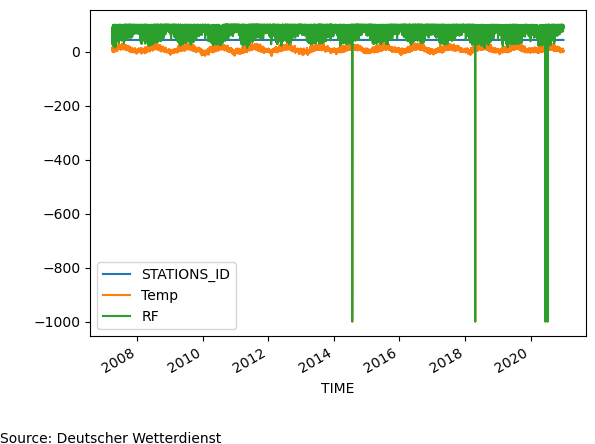

In [101]:
dwd_44_date.plot()

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')

plt.show()
plt.close()

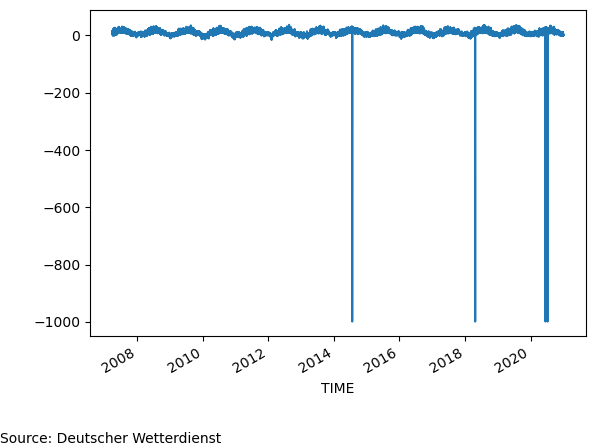

In [104]:
dwd_44_date['Temp'].plot()

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')

plt.show()
plt.close()

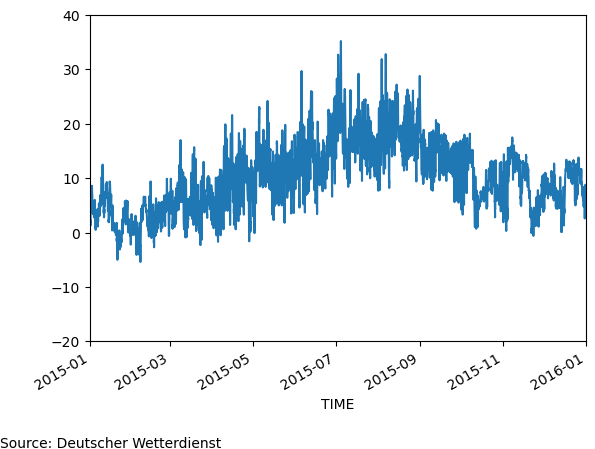

In [106]:
dwd_44_date['Temp'].plot()

plt.ylim(-20,40)
plt.xlim(pd.Timestamp(2015,1,1),pd.Timestamp(2016,1,1))

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')

plt.show()
plt.close()

## Doing Statistics

We can not only plot the data, we can also do statistics on our dataframes

For example let's check the what the minimum temperature and rel. humidity is

In [107]:
dwd_44_date.min()

STATIONS_ID     44.0
Temp          -999.0
RF            -999.0
dtype: float64

As said -999 is a placeholder for no measurements, better would be NaN so not an number, we can change this:

## Changing data

In [108]:
import numpy as np

In [109]:
dwd_44_date.where(dwd_44_date != -999.0, other=np.nan, inplace=True)

What does it change? We selected all data _where_ our _condition_ is fulfilled, so our data dwd_44_date is not equal (!=) -999.0 \
Every _other_ value is set to NaN (see Docstring)

In [110]:
dwd_44_date.min()

STATIONS_ID    44.0
Temp          -15.3
RF             14.0
dtype: float64

In [113]:
dwd_44_date.max()

STATIONS_ID     44.0
Temp            37.0
RF             100.0
dtype: float64

In [114]:
dwd_44_date.std()

STATIONS_ID     0.000000
Temp            7.210917
RF             16.531116
dtype: float64

In [115]:
dwd_44_date.mean()

STATIONS_ID    44.000000
Temp           10.145918
RF             82.331243
dtype: float64

You also might to get the statistics for just a specific timeframe for this we want to slice the dataframe


## Slicing

### loc
For slicing the dataframe in rows we can use the fucntion .loc[] \
Note how after the .loc we use the syntax from normal indexing, not ()!

In [116]:
dwd_44_date.loc['2020-02-04']

,STATIONS_ID,Temp,RF
TIME,,,
2020-02-04 00:00:00,44,5.8,85.0
2020-02-04 01:00:00,44,5.7,82.0
2020-02-04 02:00:00,44,5.0,83.0
2020-02-04 03:00:00,44,4.6,84.0
2020-02-04 04:00:00,44,4.5,83.0
2020-02-04 05:00:00,44,4.2,83.0
2020-02-04 06:00:00,44,3.8,84.0
2020-02-04 07:00:00,44,3.6,84.0
2020-02-04 08:00:00,44,3.8,83.0


This way we only get the data for that specific day

But as done for arrays you can also give a range to select

In [119]:
dwd_44_date.loc['2020-02-04':'2020-02-05']

,STATIONS_ID,Temp,RF
TIME,,,
2020-02-04 00:00:00,44,5.8,85.0
2020-02-04 01:00:00,44,5.7,82.0
2020-02-04 02:00:00,44,5.0,83.0
2020-02-04 03:00:00,44,4.6,84.0
2020-02-04 04:00:00,44,4.5,83.0
2020-02-04 05:00:00,44,4.2,83.0
2020-02-04 06:00:00,44,3.8,84.0
2020-02-04 07:00:00,44,3.6,84.0
2020-02-04 08:00:00,44,3.8,83.0


In [121]:
# storing this in a new variable we can do statistiucs on this 
data_feb = dwd_44_date.loc['2020-02']

In [122]:
data_feb.min()

STATIONS_ID    44.0
Temp           -2.5
RF             52.0
dtype: float64

In [123]:
data_feb.max()

STATIONS_ID     44.0
Temp            16.9
RF             100.0
dtype: float64

## Group by
Group by is a function to group your data by a specific value from a column. For example if we would create a column with the year in it, we could group all elements with the same year in on single row

First let's create a new column

In [125]:
dwd_44_date['Year'] = dwd_44_date.index.year

In [126]:
dwd_44_date.head()

,STATIONS_ID,Temp,RF,Year
TIME,,,,
2007-04-01 00:00:00,44,7.3,78.0,2007
2007-04-01 01:00:00,44,6.4,79.0,2007
2007-04-01 02:00:00,44,5.4,80.0,2007
2007-04-01 03:00:00,44,4.9,80.0,2007
2007-04-01 04:00:00,44,4.5,77.0,2007


In [127]:
dwd_44_date.tail()


,STATIONS_ID,Temp,RF,Year
TIME,,,,
2020-12-31 19:00:00,44,0.6,97.0,2020
2020-12-31 20:00:00,44,0.0,98.0,2020
2020-12-31 21:00:00,44,0.3,99.0,2020
2020-12-31 22:00:00,44,1.2,97.0,2020
2020-12-31 23:00:00,44,1.4,93.0,2020


In [128]:
#let's now use the groupby
dwd_44_date.groupby('Year')

You see, that we do not get directly an visual output, this is because pandas kinda waits for us to tell it what it should do with these grouped data \
We wanted it to be averaged by 

In [129]:
dwd_yearly_mean = dwd_44_date.groupby('Year').mean()

In [130]:
dwd_yearly_mean

,STATIONS_ID,Temp,RF
Year,,,
2007,44.0,12.436117,80.875454
2008,44.0,10.125444,81.654484
2009,44.0,9.871381,81.337100
2010,44.0,8.221187,82.586644
2011,44.0,10.089144,83.148402
2012,44.0,9.749387,83.018990
2013,44.0,9.028718,82.558259
2014,44.0,10.814060,83.598968
2015,44.0,10.120704,83.771252


In [131]:
dwd_yearly_max = dwd_44_date.groupby('Year').max()


In [132]:
dwd_yearly_max

,STATIONS_ID,Temp,RF
Year,,,
2007,44,30.9,100.0
2008,44,32.2,100.0
2009,44,35.0,100.0
2010,44,33.6,100.0
2011,44,30.7,100.0
2012,44,37.0,100.0
2013,44,34.2,100.0
2014,44,32.2,100.0
2015,44,35.2,100.0


And this can also be done per month

In [133]:
dwd_44_date['Month'] = dwd_44_date.index.month_name()

In [134]:
dwd_44_date.head()

,STATIONS_ID,Temp,RF,Year,Month
TIME,,,,,
2007-04-01 00:00:00,44,7.3,78.0,2007,April
2007-04-01 01:00:00,44,6.4,79.0,2007,April
2007-04-01 02:00:00,44,5.4,80.0,2007,April
2007-04-01 03:00:00,44,4.9,80.0,2007,April
2007-04-01 04:00:00,44,4.5,77.0,2007,April


In [141]:
dwd_monthly_mean = dwd_44_date.groupby('Month').mean()

In [142]:
dwd_monthly_mean

,STATIONS_ID,Temp,RF,Year
Month,,,,
April,44.0,9.767856,72.864766,2013.500000
August,44.0,17.600307,79.298579,2013.500000
December,44.0,3.813427,91.520540,2013.669688
February,44.0,2.720652,85.905344,2014.000000
January,44.0,2.154465,90.808036,2014.104134
July,44.0,17.878683,77.827766,2013.496962
June,44.0,16.294067,76.296929,2013.500298
March,44.0,5.345058,80.603805,2014.000000
May,44.0,13.256941,72.161098,2013.500000


In [143]:
dwd_monthly_mean.drop(['STATIONS_ID', 'Year'], axis = 1, inplace = True)

In [144]:
dwd_monthly_mean

,Temp,RF
Month,,
April,9.767856,72.864766
August,17.600307,79.298579
December,3.813427,91.520540
February,2.720652,85.905344
January,2.154465,90.808036
July,17.878683,77.827766
June,16.294067,76.296929
March,5.345058,80.603805
May,13.256941,72.161098


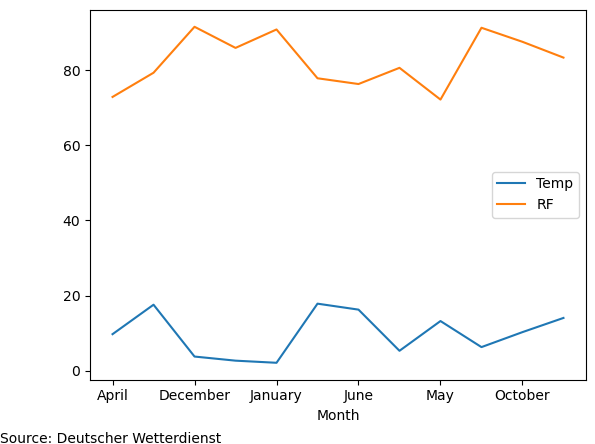

In [146]:
dwd_monthy_mean.plot()

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')

plt.show()
plt.close()

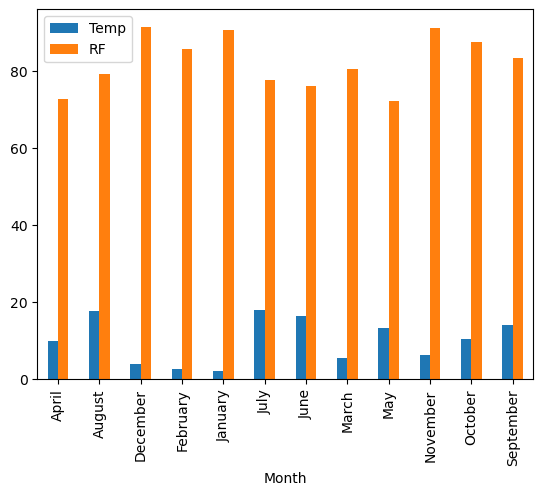

In [147]:
# we can alse use a bar plot
dwd_monthly_mean.plot(kind='bar')

plt.show()
plt.close()

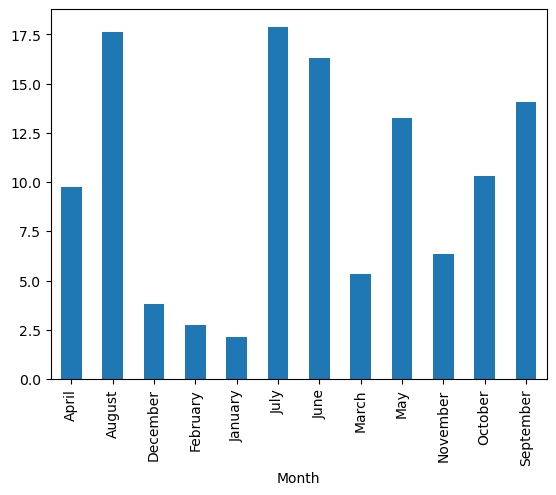

In [148]:
# or plot just one column
dwd_monthly_mean['Temp'].plot(kind='bar')

plt.show()
plt.close()

## Combining data
We can also combine multiple datasets into one single dataset. E.g. We want to combine the data for 2010 with the data for 2020

In [149]:
dwd_44_date.head(2)

,STATIONS_ID,Temp,RF,Year,Month
TIME,,,,,
2007-04-01 00:00:00,44,7.3,78.0,2007,April
2007-04-01 01:00:00,44,6.4,79.0,2007,April


In [151]:
dwd_2010 = dwd_44_date.where(dwd_44_date['Year'] == 2010)

In [154]:
dwd_2010.head(2)

,STATIONS_ID,Temp,RF,Year,Month
TIME,,,,,
2007-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2007-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN


In [155]:
dwd_2010.dropna(inplace = True)

In [156]:
dwd_2010.head(2)

,STATIONS_ID,Temp,RF,Year,Month
TIME,,,,,
2010-01-01 00:00:00,44.0,-0.1,72.0,2010.0,January
2010-01-01 01:00:00,44.0,-0.3,76.0,2010.0,January


In [158]:
# And we do the same for 2020:

dwd_2020 = dwd_44_date.where(dwd_44_date['Year'] == 2020)
dwd_2020.dropna(inplace = True)

In [160]:
dwd_2020.head(2)

,STATIONS_ID,Temp,RF,Year,Month
TIME,,,,,
2020-01-01 00:00:00,44.0,0.1,98.0,2020.0,January
2020-01-01 01:00:00,44.0,-0.4,99.0,2020.0,January


In [161]:
# to combine both, we use pd,concate, to concatenate both dataframe

dwd_10_20 = pd.concat([dwd_2010, dwd_2020])

In [162]:
dwd_10_20

,STATIONS_ID,Temp,RF,Year,Month
TIME,,,,,
2010-01-01 00:00:00,44.0,-0.1,72.0,2010.0,January
2010-01-01 01:00:00,44.0,-0.3,76.0,2010.0,January
2010-01-01 02:00:00,44.0,-0.7,81.0,2010.0,January
2010-01-01 03:00:00,44.0,-0.7,79.0,2010.0,January
2010-01-01 04:00:00,44.0,-0.7,80.0,2010.0,January
...,...,...,...,...,...
2020-12-31 19:00:00,44.0,0.6,97.0,2020.0,December
2020-12-31 20:00:00,44.0,0.0,98.0,2020.0,December
2020-12-31 21:00:00,44.0,0.3,99.0,2020.0,December


This can be very useful when having the data stored in individual files, together with module like glob, os and listcomprehension one can easily combine multiple data files into one single dataframe, to save and analyse

## Glob and OS
As just said combining data from different files can be useful, for this we have to know how to open multiple files automatically, there are multiple ways to do this \
In this course we will focus on using glob

In [163]:
import glob
import os

In the directory data/ammda/2021 you will find the data for one more stations, the data is again downlaoded from DWD as shown above

In [165]:
ls /data/ammda/2021/

inflammation-01.csv
stundenwerte_TU_00044_20070401_20201231_hist/
stundenwerte_TU_00102_20020101_20201231_hist/


In [166]:
ls /data/ammda/2021/stundenwerte_TU_00044_20070401_20201231_hist/

Metadaten_Fehldaten_00044_20070401_20210329.html
Metadaten_Fehldaten_00044_20070401_20210329.txt
Metadaten_Fehlwerte_00044_20070401_20210329.txt
Metadaten_Fehlwerte_Gesamt_00044.txt
Metadaten_Geographie_00044.txt
Metadaten_Geraete_Lufttemperatur_00044.html
Metadaten_Geraete_Lufttemperatur_00044.txt
Metadaten_Geraete_Rel_Feuchte_00044.html
Metadaten_Geraete_Rel_Feuchte_00044.txt
Metadaten_Parameter_tu_stunde_00044.html
Metadaten_Parameter_tu_stunde_00044.txt
Metadaten_Stationsname_00044.html
Metadaten_Stationsname_00044.txt
produkt_tu_stunde_20070401_20201231_00044.txt
Source.txt


In [167]:
ls /data/ammda/2021/stundenwerte_TU_00102_20020101_20201231_hist/

Metadaten_Fehldaten_00102_20020101_20210329.html
Metadaten_Fehldaten_00102_20020101_20210329.txt
Metadaten_Fehlwerte_00102_20020101_20210329.txt
Metadaten_Fehlwerte_Gesamt_00102.txt
Metadaten_Geographie_00102.txt
Metadaten_Geraete_Lufttemperatur_00102.html
Metadaten_Geraete_Lufttemperatur_00102.txt
Metadaten_Geraete_Rel_Feuchte_00102.html
Metadaten_Geraete_Rel_Feuchte_00102.txt
Metadaten_Parameter_tu_stunde_00102.html
Metadaten_Parameter_tu_stunde_00102.txt
Metadaten_Stationsname_00102.html
Metadaten_Stationsname_00102.txt
produkt_tu_stunde_20020101_20201231_00102.txt


In [169]:
glob.glob('/data/ammda/2021/stundenwerte_TU_*/produkt_*')

['/data/ammda/2021/stundenwerte_TU_00102_20020101_20201231_hist/produkt_tu_stunde_20020101_20201231_00102.txt',
 '/data/ammda/2021/stundenwerte_TU_00044_20070401_20201231_hist/produkt_tu_stunde_20070401_20201231_00044.txt']

In [170]:
filelist = glob.glob('/data/ammda/2021/stundenwerte_TU_*/produkt_*')

for file in filelist:
    print(file)

/data/ammda/2021/stundenwerte_TU_00102_20020101_20201231_hist/produkt_tu_stunde_20020101_20201231_00102.txt
/data/ammda/2021/stundenwerte_TU_00044_20070401_20201231_hist/produkt_tu_stunde_20070401_20201231_00044.txt


Instead of printing the filename, we could use it in the read_csv we used in the beginning of this lesson

In [172]:
filelist = glob.glob('/data/ammda/2021/stundenwerte_TU_*/produkt_*')

for file in filelist:
    data = pd.read_csv(file, sep=';')
    print(data.head())

   STATIONS_ID  MESS_DATUM  QN_9  TT_TU  RF_TU  eor
0          102  2002010100     3    3.7   93.0  eor
1          102  2002010101     3    3.8   90.0  eor
2          102  2002010102     3    4.0   91.0  eor
3          102  2002010103     3    4.6   89.0  eor
4          102  2002010104     3    4.7   90.0  eor
   STATIONS_ID  MESS_DATUM  QN_9  TT_TU  RF_TU  eor
0           44  2007040100     3    7.3   78.0  eor
1           44  2007040101     3    6.4   79.0  eor
2           44  2007040102     3    5.4   80.0  eor
3           44  2007040103     3    4.9   80.0  eor
4           44  2007040104     3    4.5   77.0  eor


You see, that we have first the station data from station 102 and afterwards station 44

In [173]:
# now we can just use of the modification we did before:
for file in filelist:
    data = pd.read_csv(file, sep=';')
    #creating a new column 'Time' with the measurement as a datetime object
    data['Time'] = pd.to_datetime(data['MESS_DATUM'], format = '%Y%m%d%H')
    #set this as an index
    data.set_index('Time', inplace = True)
    #and get rid of the not need columns 
    data.drop(['eor', 'QN_9'], axis = 1, inplace = True)
    #replace the placeholder value -999 with nans
    data.where(data != -999.0,  inplace=True)
    #print the data to look at the result
    print(data.head())

                     STATIONS_ID  MESS_DATUM  TT_TU  RF_TU
Time                                                      
2002-01-01 00:00:00          102  2002010100    3.7   93.0
2002-01-01 01:00:00          102  2002010101    3.8   90.0
2002-01-01 02:00:00          102  2002010102    4.0   91.0
2002-01-01 03:00:00          102  2002010103    4.6   89.0
2002-01-01 04:00:00          102  2002010104    4.7   90.0
                     STATIONS_ID  MESS_DATUM  TT_TU  RF_TU
Time                                                      
2007-04-01 00:00:00           44  2007040100    7.3   78.0
2007-04-01 01:00:00           44  2007040101    6.4   79.0
2007-04-01 02:00:00           44  2007040102    5.4   80.0
2007-04-01 03:00:00           44  2007040103    4.9   80.0
2007-04-01 04:00:00           44  2007040104    4.5   77.0


So you see we read and processed both datasets in the loop, but our data is overwritten in the second iteration:

In [174]:
data.head()

,STATIONS_ID,MESS_DATUM,TT_TU,RF_TU
Time,,,,
2007-04-01 00:00:00,44,2007040100,7.3,78.0
2007-04-01 01:00:00,44,2007040101,6.4,79.0
2007-04-01 02:00:00,44,2007040102,5.4,80.0
2007-04-01 03:00:00,44,2007040103,4.9,80.0
2007-04-01 04:00:00,44,2007040104,4.5,77.0


And only the last data read in is stored in data, but since we want to combine them in a big dataset anyway it's ok

We create an empty DataFrame called data_big

And concat both the read in data in each iteration to the (first empty) dataset named data_big

In [176]:
filelist = glob.glob('/data/ammda/2021/stundenwerte_TU_*/produkt_*')

data_big = pd.DataFrame()

for file in filelist:
    data = pd.read_csv(file, sep = ';')
    data['Time'] = pd.to_datetime(data['MESS_DATUM'], format = '%Y%m%d%H')
    data.set_index('Time', inplace = True)
    data.drop(['QN_9', 'eor'], axis = 1, inplace = True)
    data.where(data != -999.0, inplace = True)
    
    data_big = pd.concat([data_big,data])

In [177]:
data_big

,STATIONS_ID,MESS_DATUM,TT_TU,RF_TU
Time,,,,
2002-01-01 00:00:00,102,2002010100,3.7,93.0
2002-01-01 01:00:00,102,2002010101,3.8,90.0
2002-01-01 02:00:00,102,2002010102,4.0,91.0
2002-01-01 03:00:00,102,2002010103,4.6,89.0
2002-01-01 04:00:00,102,2002010104,4.7,90.0
...,...,...,...,...
2020-12-31 19:00:00,44,2020123119,0.6,97.0
2020-12-31 20:00:00,44,2020123120,0.0,98.0
2020-12-31 21:00:00,44,2020123121,0.3,99.0


And with .where we can always just choose the data we want to have

Text(0, 1, 'Source: Deutscher Wetterdienst')

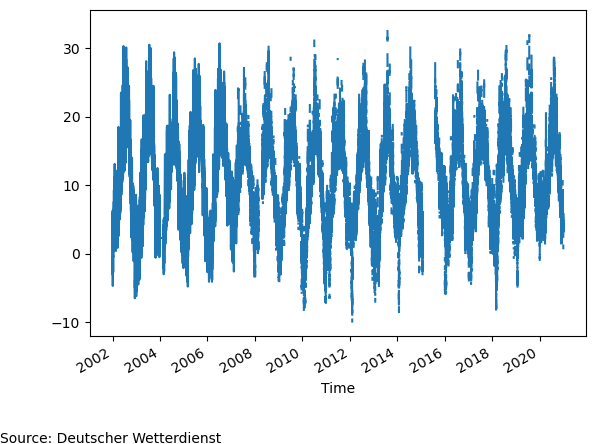

In [179]:
data_big.where(data_big['STATIONS_ID'] == 102)['TT_TU'].plot()

plt.annotate('Source: Deutscher Wetterdienst', xy=(0,1), xycoords='figure points')